# Section 2) Explain your data set, how it is composed, and how you collected it (30%)

## data explanation
#### Q1: Age
#### Q2: What category do you fall under? (undergraduate or Graduate)
#### Q9: Are you employed?
#### Q10: What is your average monthly income, including money from outside sources such as stipend scholarships, or allowance from your parents?
#### Q17: Have you ever invested?
#### Q18: If you have invested, what have you invested on (select more than one)?
#### Q20: What is your average monthly spending (not including rent/utilities)?
#### Q21: What do you spend the most money on?
#### Q27: What do you think is the minimum amount needed to make an investment?
#### Q28: What do you usually spend your credit card cash back on?
#### Q29: On a scale of 1 to 5, 1 being not at all and 5 being definitely, how likely would you be to invest your cash back bonus? 
#### Q30: What is your area of study (you may select more than one option)?
#### Q31: "You are given the option to choose Credit Card A or Credit Card B each with the following cash back options:
#### Credit card A:-Redeem as cash-Apply to statement-Redeem as gift card ($20 minimum)
#### Credit Card B:-Redeem as cash-Apply to statement-Invest in a stock (no minimum)
#### Which credit card option would you be likely to choose?"
#### Q32: Would you rather invest your own money or money received from a cash back bonus?
#### Q33: On a scale of 1 to 5, 1 being not at all and 5 being definitely, how likely would you be to invest your own money? 
#### Q43: What characteristics would you/do you look for when considering an investment?
#### Q44: What is more important to you when making an investment? - Selected Choice(Higher return, saving, social responsibility) 


In [26]:
# The data is collected from survery that distributed in school

# Section 3) Load of the data set (10%)

In [66]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
# preprocess the data
# Extracting Missing Count and Unique Count by Column

data = pd.read_csv('Shi_and_Song_week10_data.csv')

# Section 4) Display data (50%)

In [67]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   StartDate              48 non-null     object
 1   EndDate                48 non-null     object
 2   Status                 48 non-null     object
 3   Duration (in seconds)  48 non-null     object
 4   Finished               48 non-null     object
 5   RecordedDate           48 non-null     object
 6   DistributionChannel    48 non-null     object
 7   Q36                    47 non-null     object
 8   Q1                     44 non-null     object
 9   Q2                     44 non-null     object
 10  Q30                    44 non-null     object
 11  Q9                     45 non-null     object
 12  Q10                    43 non-null     object
 13  Q20                    43 non-null     object
 14  Q21                    44 non-null     object
 15  Q17                    39

In [68]:
# drop unnecessary data
data.drop([0,1],inplace=True)
data.drop(columns=['EndDate','Duration (in seconds)','Status','RecordedDate','DistributionChannel','Q36'],axis=1,inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 2 to 47
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   StartDate  46 non-null     object
 1   Finished   46 non-null     object
 2   Q1         42 non-null     object
 3   Q2         42 non-null     object
 4   Q30        42 non-null     object
 5   Q9         43 non-null     object
 6   Q10        41 non-null     object
 7   Q20        41 non-null     object
 8   Q21        42 non-null     object
 9   Q17        37 non-null     object
 10  Q18        32 non-null     object
 11  Q27        42 non-null     object
 12  Q42        27 non-null     object
 13  Q46        23 non-null     object
 14  Q28        38 non-null     object
 15  Q31        40 non-null     object
 16  Q32        38 non-null     object
 17  Q33_1      38 non-null     object
 18  Q29_1      38 non-null     object
 19  Q43        21 non-null     object
 20  Q44        26 non-null     object


In [69]:
# fill in some typo data
data.iloc[7,data.columns.get_loc("Q20")]=175
data.iloc[33,data.columns.get_loc("Q20")]=1750
data=data[data['Finished']=='TRUE']

In [70]:
# check out unique and missing data
unique_count = []
for x in data.columns:
    unique_count.append([x,len(data[x].unique()),data[x].isnull().sum()])
con=pd.DataFrame(unique_count, columns=["Column","Unique","Missing"]).set_index("Column").T
print(con)

Column   StartDate  Finished  Q1  Q2  Q30  Q9  Q10  Q20  Q21  Q17  ...  Q27  \
Unique          40         1   9   3    7   2   27   23    6    8  ...    5   
Missing          0         0   0   0    0   0    1    1    0    4  ...    0   

Column   Q42  Q46  Q28  Q31  Q32  Q33_1  Q29_1  Q43  Q44  
Unique    13    5    4    2    4      6      6   22    4  
Missing   14   18    2    0    2      2      2   19   14  

[2 rows x 21 columns]


In [71]:
# clear data and manage data type
data['Average_income'] = data['Q10'].apply(lambda x: re.sub("[\s+\.\!\/_,$%^*(+\"\')+\]]+|[+——([)?【】“”！，\-。？、"
                                                            "~@#￥%……&*（）]+", '', str(x)))
data['Average_spend'] = data['Q20'].apply(lambda x: re.sub("[\s+\.\!\/_,$%^*(+\"\')+\]]+|[+——([)?【】“”！，\-。"
                                                           "？、~@#￥%……&*（）]+", '', str(x)))
data['Average_income'] = pd.to_numeric(data['Average_income'], errors='coerce')
data['Average_spend'] = pd.to_numeric(data['Average_spend'], errors='coerce')
data.loc[data['Average_spend'] ==0,'Average_spend']=np.nan
data.loc[data['Average_income'] ==0,'Average_income']=np.nan

# find missing value
miss_income_col = data.loc[data['Average_income'].isnull()]['Average_spend'].unique()
print(miss_income_col)

[650. 300.]


In [72]:
# fill missing value in income
def fill_na_with_mean1(ds, value):
  fill_value = ds.loc[ds['Average_spend'] ==value]['Average_income'].mean()
  condit = ((ds['Average_spend'] == value) & (ds['Average_income'].isnull()))
  ds.loc[condit, 'Average_income'] = ds.loc[condit, 'Average_income'].fillna(fill_value)
for a in miss_income_col:
  fill_na_with_mean1(data, a)

miss_spend_col = data.loc[data['Average_spend'].isnull()]['Average_income'].unique()
print(miss_spend_col)

[1000.]


In [73]:
# fill missing value in spend
def fill_na_with_mean2(ds, value):
  fill_value = ds.loc[ds['Average_income'] ==value]['Average_spend'].mean()
  condit = ((ds['Average_income'] == value) & (ds['Average_spend'].isnull()))
  ds.loc[condit, 'Average_spend'] = ds.loc[condit, 'Average_spend'].fillna(fill_value)
for a in miss_spend_col:
  fill_na_with_mean2(data, a)

In [74]:
# check null value in spend and income
data.sort_values(by="Average_spend", ascending=True)
data['Average_income']= data['Average_income'].interpolate()
data['Average_spend'].isna().sum()

0

In [75]:
data

,StartDate,Finished,Q1,Q2,Q30,Q9,Q10,Q20,Q21,Q17,...,Q46,Q28,Q31,Q32,Q33_1,Q29_1,Q43,Q44,Average_income,Average_spend
2,11/11/2019 8:18,TRUE,23,Graduate (Masters),"Business (finance, management, accounting, etc.)",Yes,"$1,300",$450,Other,4,...,NaN,Apply to statement balance,Option A,My money,4,2,NaN,NaN,1300.0,450.0
3,11/11/2019 8:31,TRUE,22,Graduate (Masters),"Humanities (philosophy, history, english, educ...",Yes,"$1,000",$500,Groceries/day-to-day needs,1,...,NaN,Apply to statement balance,Option A,Cash back bonus,3,3,NaN,NaN,1000.0,500.0
5,11/11/2019 16:07,TRUE,22,Graduate (Masters),"Business (finance, management, accounting, etc.)",Yes,1200,400,Groceries/day-to-day needs,4,...,NaN,Redeem as cash,Option B,Cash back bonus,5,5,NaN,NaN,1200.0,400.0
6,11/12/2019 20:25,TRUE,24,Graduate (Masters),"Business (finance, management, accounting, etc.)",No,0,650,Groceries/day-to-day needs,1,...,NaN,Redeem as cash,Option B,My money,4,5,NaN,NaN,950.0,650.0
7,11/13/2019 15:13,TRUE,23,Graduate (Masters),"Business (finance, management, accounting, etc.)",Yes,700,300,Other,4,...,NaN,NaN,Option B,My money,5,5,NaN,NaN,700.0,300.0
8,11/13/2019 15:16,TRUE,22,Graduate (Masters),"Business (finance, management, accounting, etc.)",Yes,1300,900,"Eating out (restaurants, coffee, etc.)",5,...,NaN,Apply to statement balance,Option B,Cash back bonus,3,4,NaN,NaN,1300.0,900.0
9,11/13/2019 15:17,TRUE,22,Graduate (Masters),"Business (finance, management, accounting, etc.)",No,800,175,Groceries/day-to-day needs,3,...,NaN,Apply to statement balance,Option A,Cash back bonus,2,3,NaN,NaN,800.0,175.0
10,11/13/2019 15:18,TRUE,22,Graduate (Masters),"Business (finance, management, accounting, etc.)",No,880,400,"Eating out (restaurants, coffee, etc.)",4,...,NaN,Apply to statement balance,Option B,Cash back bonus,4,5,NaN,NaN,880.0,400.0
11,11/13/2019 15:22,TRUE,23,Graduate (Masters),"Business (finance, management, accounting, etc.)",No,800,500,Travel,4,...,NaN,Apply to statement balance,Option B,Cash back bonus,4,5,NaN,NaN,800.0,500.0
12,11/13/2019 20:46,TRUE,24,Graduate (Masters),"Business (finance, management, accounting, etc.)",Yes,1000,600,Groceries/day-to-day needs,4,...,NaN,Apply to statement balance,Option B,Cash back bonus,NaN,NaN,NaN,NaN,1000.0,600.0


In [76]:
# prepare selected feature
data = data.rename(columns={'Q1':'Age', 'Q9':'Employed', 'Q28':'Cashback_spending', 'Q21':'Most_expense', 'Q31':'Option',
                           'Q2':'Education_level'})
data_ml=data[['Age', 'Employed', 'Cashback_spending', 'Most_expense', 'Option', 'Average_income', 'Education_level']]

In [77]:
data_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 2 to 47
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                40 non-null     object 
 1   Employed           40 non-null     object 
 2   Cashback_spending  38 non-null     object 
 3   Most_expense       40 non-null     object 
 4   Option             40 non-null     object 
 5   Average_income     40 non-null     float64
 6   Education_level    40 non-null     object 
dtypes: float64(1), object(6)
memory usage: 2.5+ KB


In [78]:
data_ml

,Age,Employed,Cashback_spending,Most_expense,Option,Average_income,Education_level
2,23,Yes,Apply to statement balance,Other,Option A,1300.0,Graduate (Masters)
3,22,Yes,Apply to statement balance,Groceries/day-to-day needs,Option A,1000.0,Graduate (Masters)
5,22,Yes,Redeem as cash,Groceries/day-to-day needs,Option B,1200.0,Graduate (Masters)
6,24,No,Redeem as cash,Groceries/day-to-day needs,Option B,950.0,Graduate (Masters)
7,23,Yes,NaN,Other,Option B,700.0,Graduate (Masters)
8,22,Yes,Apply to statement balance,"Eating out (restaurants, coffee, etc.)",Option B,1300.0,Graduate (Masters)
9,22,No,Apply to statement balance,Groceries/day-to-day needs,Option A,800.0,Graduate (Masters)
10,22,No,Apply to statement balance,"Eating out (restaurants, coffee, etc.)",Option B,880.0,Graduate (Masters)
11,23,No,Apply to statement balance,Travel,Option B,800.0,Graduate (Masters)
12,24,Yes,Apply to statement balance,Groceries/day-to-day needs,Option B,1000.0,Graduate (Masters)


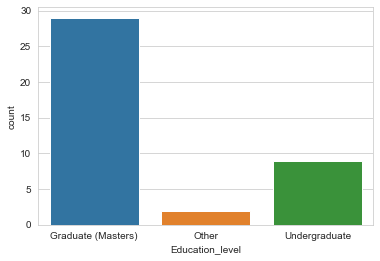

In [87]:
# visualize education 
sns.set_style('whitegrid')
sns.countplot(x='Education_level',data=data_ml)

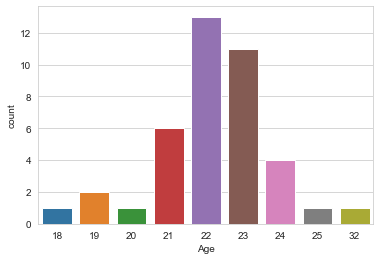

In [85]:
# visualize age
sns.set_style('whitegrid')
sns.countplot(x='Age',data=data_ml)